In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Some of the questions answered by the following analysis will be :

* In what neighbourhoo/neighbourhood group do we find the biggest amount of listings ?
* What type of room type is the most popular?
* How are skewed are the input variables?
* What are the factors that influence most the air b and b price based on the dataset information?


## Import the data, check missing values , drop not necessary columns

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Check missing values

In [3]:
#df.describe()
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
df[df.isnull().any(axis=1)].groupby('number_of_reviews').count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
number_of_reviews,,,,,,,,,,,,,,,
0,10052,10042,10052,10047,10052,10052,10052,10052,10052,10052,10052,0,0,10052,10052
1,5,3,5,2,5,5,5,5,5,5,5,5,5,5,5
2,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
3,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
5,3,1,3,2,3,3,3,3,3,3,3,3,3,3,3
6,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
28,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
34,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
37,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1


Anytime there is a missing value for last review there is a missing value for review per month as well ! Those are the listings that have not been booked yet since their total number of reviews is 0, so the data is accurate for all these rows and should not be dropped. I will fill in the last review as 0 and reviews per month as 0

In [5]:
df['last_review'].fillna(0, inplace=True)

In [6]:
df['reviews_per_month'].fillna(0, inplace=True)

Anytime there is a missing value for last review there is a missing value for review per month as well ! Those are the listings that have not been booked yet!

There are some missing hosts or place's names at random (21 out of 48k rows) , and they do not seem to affect the quality of the dataset. They might have all the other fields populated, so the rows should be still kept.

First, I will drop columns that will not be a predictor of the price like the host name or latitude/longitude. 
We already have neighborhood and borough info so latitude and longitude would not be important

In [7]:
df1 = df.copy()

In [8]:
df.drop(['name', 'host_name', 'latitude', 'longitude'], axis = 1, inplace=True) 

In [9]:
df.drop_duplicates(inplace=True)

## Visualizations and plots

In [10]:
df.head(3)

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,0,0.00,1,365


In [11]:
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### What is the number of listing per host distribution  ? 

In [12]:
#df[['id','host_id']].groupby('host_id').count()

df2 = df[['host_id','id']].groupby(['host_id'])['id'].size().nlargest(10).reset_index(name='top5')
            
df2.head(10)

,host_id,top5
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


In [13]:
df3 = df[['host_id','id']].groupby('host_id').count().reset_index()
df3.head()

,host_id,id
0,2438,1
1,2571,1
2,2787,6
3,2845,2
4,2868,1


In [14]:
df3.describe()

,host_id,id
count,3.745700e+04,37457.000000
mean,6.144549e+07,1.305363
std,7.511750e+07,2.760747
min,2.438000e+03,1.000000
25%,7.050126e+06,1.000000
50%,2.679050e+07,1.000000
75%,8.817184e+07,1.000000
max,2.743213e+08,327.000000


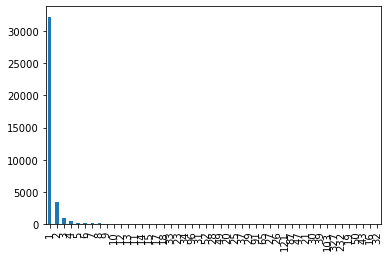

In [15]:
df3['id'].value_counts().plot(kind='bar')
plt.show()

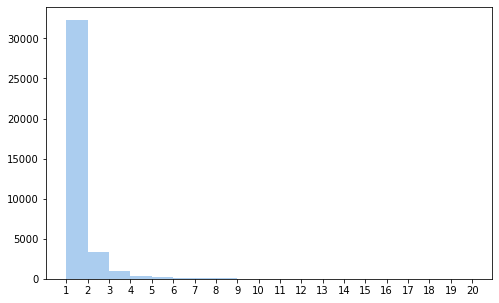

In [16]:
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

plt.figure(figsize=(8,5))

plt.hist(df3.id, bins=bins, color='#abcdef')

plt.xticks(bins)

plt.show()

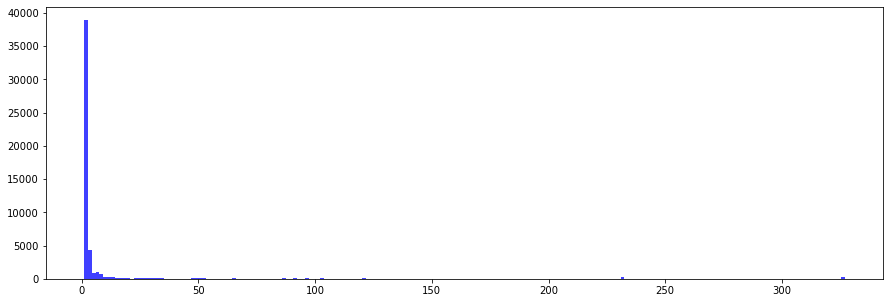

In [17]:
plt.figure(figsize=(15,5))

plt.hist(df['calculated_host_listings_count'], 200, facecolor='b', alpha=0.75)
plt.show()

#### What is the neighborhood with most listings? 

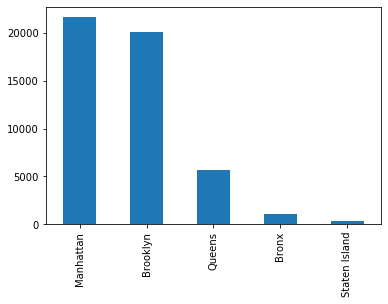

In [18]:
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.show()

#### What is the borough with most listings? 

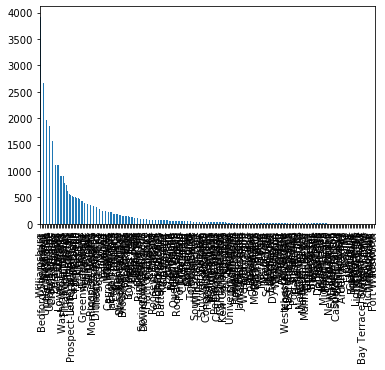

In [19]:
df['neighbourhood'].value_counts().plot(kind='bar')
plt.show()

There are too many values so I will just print out the 20 most listed ones

In [20]:
#df[['id','host_id']].groupby('host_id').count()

df4 = df[['neighbourhood','id']].groupby(['neighbourhood'])['id'].size().nlargest(20).reset_index(name='top5')
            
df4.head(20)

,neighbourhood,top5
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


What are the 20 least listed? 

In [21]:
df5 = df[['neighbourhood','id']].groupby(['neighbourhood'])['id'].size().nsmallest(20).reset_index(name='top5')
            
df5.head(20)

,neighbourhood,top5
0,Fort Wadsworth,1
1,New Dorp,1
2,Richmondtown,1
3,Rossville,1
4,Willowbrook,1
5,Woodrow,1
6,"Bay Terrace, Staten Island",2
7,Co-op City,2
8,Howland Hook,2
9,Lighthouse Hill,2


#### How is the room type distribution?

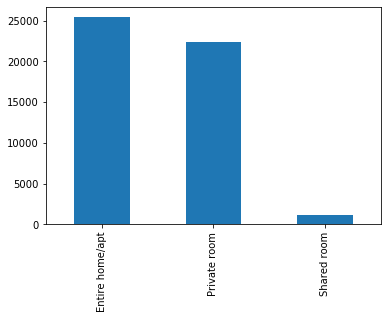

In [22]:
df['room_type'].value_counts().plot(kind='bar')
plt.show()

#### How about the minimum nights? 

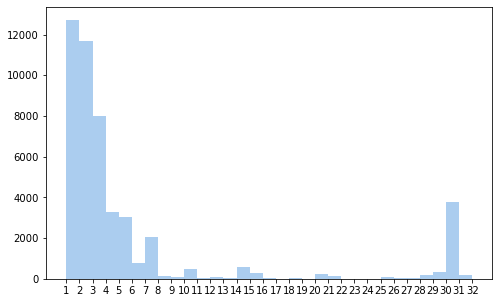

In [23]:
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

plt.figure(figsize=(8,5))

plt.hist(df['minimum_nights'], bins=bins, color='#abcdef')

plt.xticks(bins)

plt.show()

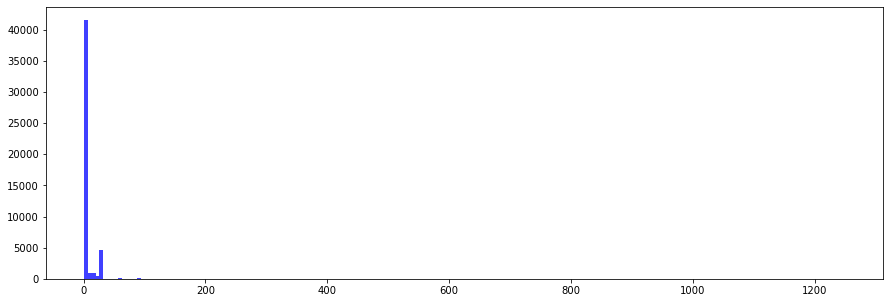

In [24]:
plt.figure(figsize=(15,5))

plt.hist(df['minimum_nights'], 200, facecolor='b', alpha=0.75)
plt.show()

#### Number of reviews ? 

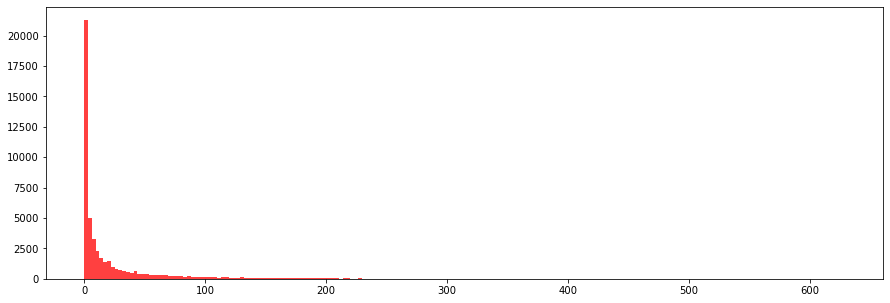

In [25]:
plt.figure(figsize=(15,5))

plt.hist(df['number_of_reviews'], 200, facecolor='r', alpha=0.75)
plt.show()

#### Number of reviews per month ? 

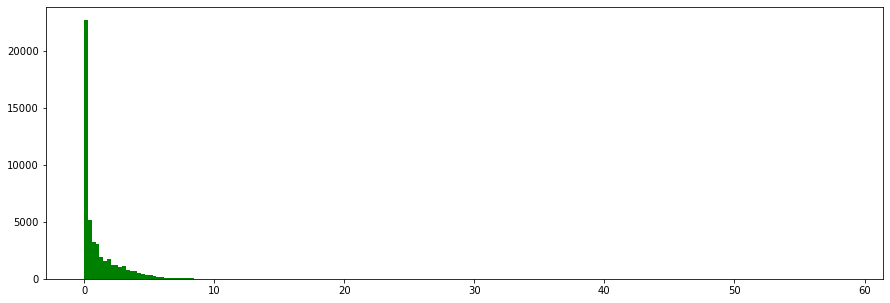

In [26]:
plt.figure(figsize=(15,5))

plt.hist(df['reviews_per_month'], 200, facecolor='g', alpha=1)
plt.show()

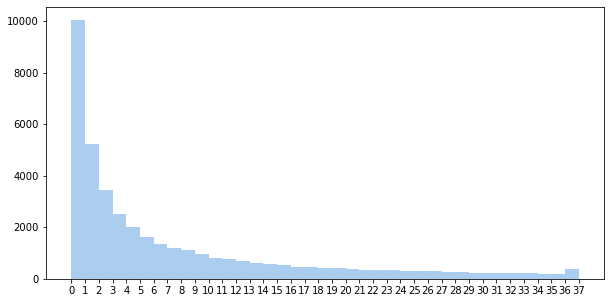

In [27]:
bins = [0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]

plt.figure(figsize=(10,5))

plt.hist(df['number_of_reviews'], bins=bins, color='#abcdef')

plt.xticks(bins)

plt.show()

#### What is the price distribution? 

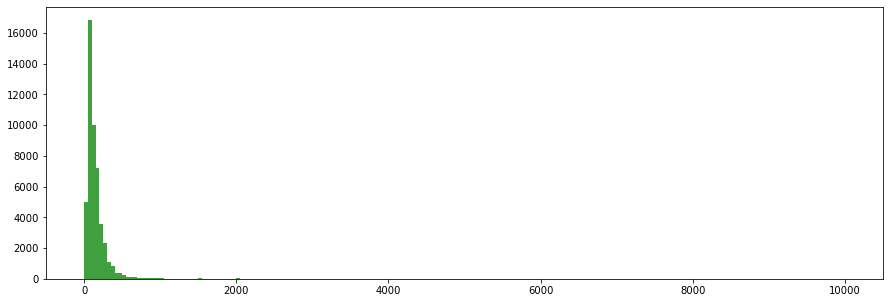

In [28]:
plt.figure(figsize=(15,5))

plt.hist(df['price'], 200, facecolor='g', alpha=0.75)
plt.show()

#### What is the 365 availability? 

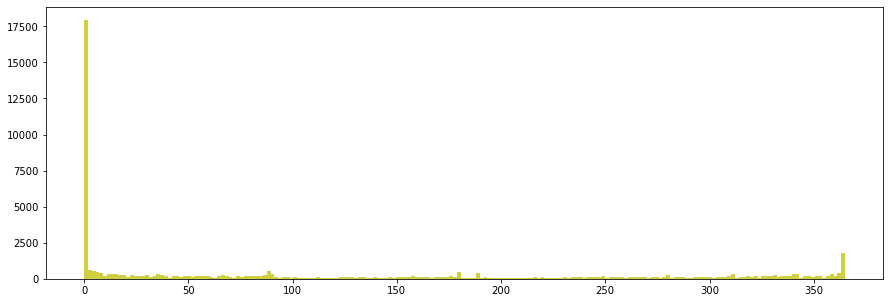

In [29]:
plt.figure(figsize=(15,5))

plt.hist(df['availability_365'], 200, facecolor='y', alpha=0.75)
plt.show()


### Correlation plot

In [30]:
df.drop(['host_id', 'id'], axis = 1, inplace=True) 

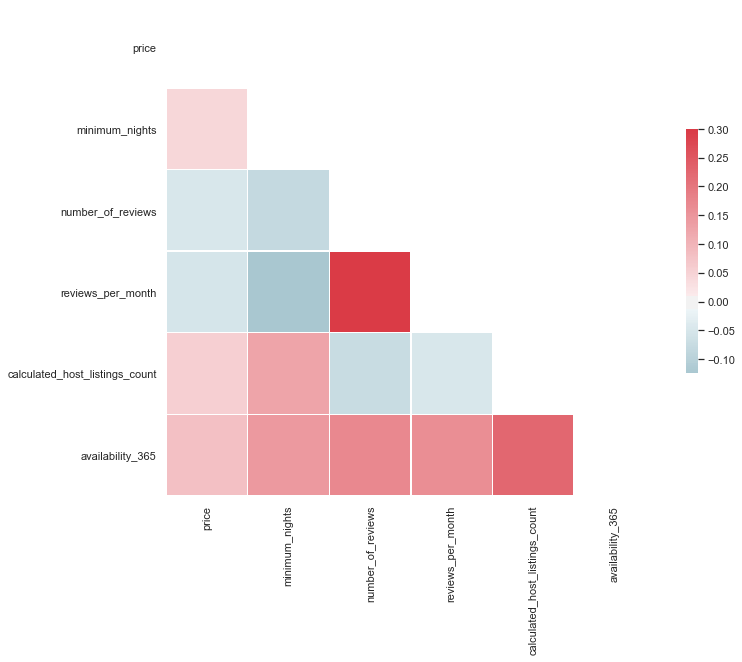

In [31]:
from string import ascii_letters


sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
#Next steps : price distribution , correlation matrix, other distributions
# what are the key preditiors for price? 
#standard scaler and onehot encoder
#regression model : try random forest, multivariable regression, xgboost 


## EDA to reduce neighbourhoods , correlation on the  reservations, remove ouliers, and use the last review time variables

In [33]:
df11 = df1.iloc[:, 6:8]

In [34]:
df11.head(3)

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190


#### EDA step 1 Assignment of Clusters for each neighbourhood and reduce the buckets

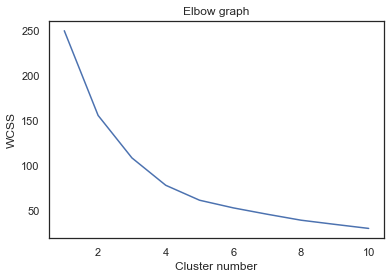

In [35]:
from sklearn.cluster import KMeans
import matplotlib

#grouped_clustering = rome_grouped.drop('Neighborhood', 1)

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df11)
    wcss.append(kmeans.inertia_)


# In[221]:


plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [36]:
from sklearn.cluster import KMeans
k=6
#NY_clustering = df1(['latitude','longitude']
kmeans = KMeans(n_clusters = k,random_state=0).fit(df11)
kmeans.labels_
df1.insert(0, 'Cluster', kmeans.labels_)

#### What is the cluster distribution?

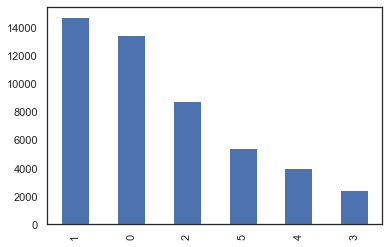

In [37]:
df1['Cluster'].value_counts().plot(kind='bar')
plt.show()

### I will have to Clean up outliers since once the model is fitted even with tuning, the R square is poor (around 0.1 R squared). Most of the features are significantly skewed

In [38]:
df1.median()

Cluster                           1.000000e+00
id                                1.967728e+07
host_id                           3.079382e+07
latitude                          4.072307e+01
longitude                        -7.395568e+01
price                             1.060000e+02
minimum_nights                    3.000000e+00
number_of_reviews                 5.000000e+00
reviews_per_month                 3.700000e-01
calculated_host_listings_count    1.000000e+00
availability_365                  4.500000e+01
dtype: float64

In [39]:
df1.describe()

,Cluster,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.690643,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.638324,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.000000,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.000000,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,5.000000,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### EDA step 2 Outliers removal

In [40]:
#Clean up the data removing outliers. I will consider an outlier a value that is 3 std higher than the average. 
# I will not consider smaller values since they are into the regular std boundaries
cutoffprice = 106 + (2*240)
#df1.drop(df1.loc[df1['minimum_nights']> cutoffmn].index, inplace=True)
#df1.drop(df1.loc[df1['number_of_reviews']> cutoffne].index, inplace=True)
#df1.drop(df1.loc[df1['reviews_per_month']> cutoffrpm].index, inplace=True)
#df1.drop(df1.loc[df1['calculated_host_listings_count']> cutoffhlc].index, inplace=True)

df1.drop(df1.loc[df1['price']> cutoffprice].index, inplace=True)
df1.drop(df1.loc[df1['minimum_nights']> (3*20)].index, inplace=True)
df1.drop(df1.loc[df1['number_of_reviews']> (5*44*2)].index, inplace=True)
df1.drop(df1.loc[df1['reviews_per_month']> (3* 2*4)].index, inplace=True)
df1.drop(df1.loc[df1['calculated_host_listings_count']> (3* 10*1)].index, inplace=True)





In [41]:
df1.describe()

,Cluster,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,45838.000000,4.583800e+04,4.583800e+04,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000
mean,1.750665,1.884955e+07,6.611981e+07,40.728197,-73.950686,130.303242,5.100397,24.243750,1.131107,2.042345,103.981260
std,1.641823,1.096029e+07,7.800472e+07,0.055402,0.046457,89.424849,7.867183,44.427538,1.590409,2.892413,127.323764
min,0.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,9.343940e+06,7.544635e+06,40.688810,-73.981840,67.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,1.000000,1.946933e+07,2.999300e+07,40.721440,-73.954410,100.000000,2.000000,6.000000,0.410000,1.000000,35.000000
75%,3.000000,2.884959e+07,1.034883e+08,40.763430,-73.934443,165.000000,4.000000,26.000000,1.680000,2.000000,193.000000
max,5.000000,3.648724e+07,2.743213e+08,40.913060,-73.712990,585.000000,60.000000,439.000000,20.940000,30.000000,365.000000


In [42]:
df1.describe()

,Cluster,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,45838.000000,4.583800e+04,4.583800e+04,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000
mean,1.750665,1.884955e+07,6.611981e+07,40.728197,-73.950686,130.303242,5.100397,24.243750,1.131107,2.042345,103.981260
std,1.641823,1.096029e+07,7.800472e+07,0.055402,0.046457,89.424849,7.867183,44.427538,1.590409,2.892413,127.323764
min,0.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,9.343940e+06,7.544635e+06,40.688810,-73.981840,67.000000,1.000000,1.000000,0.050000,1.000000,0.000000
50%,1.000000,1.946933e+07,2.999300e+07,40.721440,-73.954410,100.000000,2.000000,6.000000,0.410000,1.000000,35.000000
75%,3.000000,2.884959e+07,1.034883e+08,40.763430,-73.934443,165.000000,4.000000,26.000000,1.680000,2.000000,193.000000
max,5.000000,3.648724e+07,2.743213e+08,40.913060,-73.712990,585.000000,60.000000,439.000000,20.940000,30.000000,365.000000


#### EDA step 3 : give a numerical significance to the date of the last review

In [43]:
import datetime as dt

In [44]:
lastDate = dt.datetime(2019,7, 8)



In [45]:
df1['Last_review'] =  pd.to_datetime(df1['last_review'])

In [46]:
df1['diff_weeks'] = lastDate - df1['Last_review']
df1['diff_weeks']=df1['diff_weeks']/np.timedelta64(1,'W')

#### How many weeks passed since the last review?

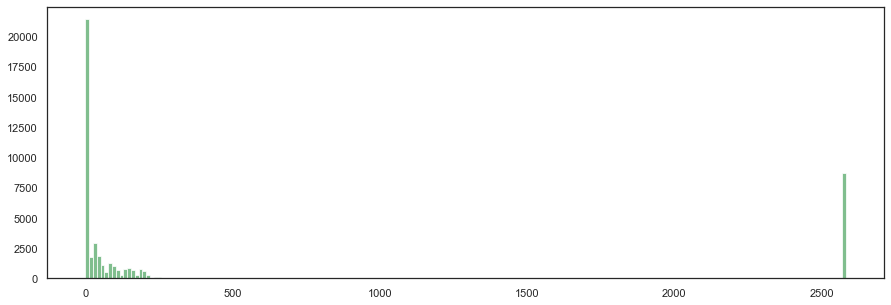

In [47]:
plt.figure(figsize=(15,5))

plt.hist(df1['diff_weeks'], 200, facecolor='g', alpha=0.75)
plt.show()

The big last number is for the conversion to time with the places with no reviews.
I will substitute that with the maximum number of weeks passed by in the dataset from the last review. In order to reduce the skewness, as done earlier, I will leave cut off the date diff variable up to 3 std from the median (100 weeks). That value will be assigned to the places with no reviews as well.

In [48]:
df1.drop(['id','name', 'host_id', 'host_name', 'neighbourhood_group', 'latitude','longitude', 'neighbourhood', 'last_review', 'Last_review'],axis =1, inplace=True)

In [49]:
#df1.loc[df1['diff_weeks'] == 2583.571429, 'diff_weeks'] = 171


#df1.loc[(df1.diff_weeks == 2583.571429),'diff_weeks']= 171


#df1['diff_weeks'] = df1.apply(lambda x: x == 171 if x == 2583.571429 else x, axis=1)

#df1.where((df1['diff_weeks'] == 2583.571429 , 171), inplace=True)

#z['c'] = z.apply(lambda x: math.log(x.b) if x.b > 0 else 0, axis=1)

df1['diff_weeks'].mask(df1['diff_weeks'] == df1['diff_weeks'].max() , 100, inplace=True)

In [50]:
df1.describe()

,Cluster,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,diff_weeks
count,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000,45838.000000
mean,1.750665,130.303242,5.100397,24.243750,1.131107,2.042345,103.981260,50.988855
std,1.641823,89.424849,7.867183,44.427538,1.590409,2.892413,127.323764,58.378842
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,67.000000,1.000000,1.000000,0.050000,1.000000,0.000000,2.571429
50%,1.000000,100.000000,2.000000,6.000000,0.410000,1.000000,35.000000,23.714286
75%,3.000000,165.000000,4.000000,26.000000,1.680000,2.000000,193.000000,100.000000
max,5.000000,585.000000,60.000000,439.000000,20.940000,30.000000,365.000000,432.000000


#### EDA step 4 form a review score given by multiplying the number of reservation with reviews per month, since the two are correlated in a positive way

In [51]:
df1['review_score'] = df1['number_of_reviews'] * df1['reviews_per_month']

#### How are the numerical column correlated with the response variable  ?

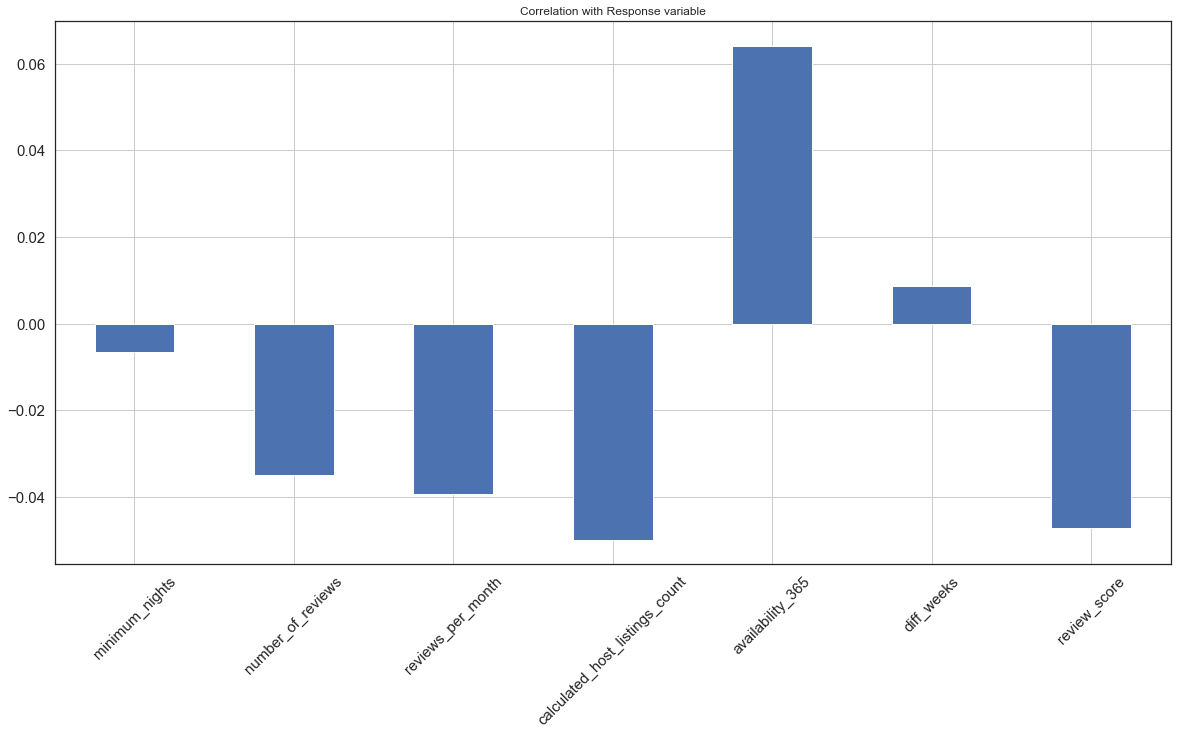

In [52]:
df1.drop(columns = ['price','Cluster']
    ).corrwith(df1.price).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)


In [55]:
df1.drop(['number_of_reviews', 'reviews_per_month'],axis =1, inplace=True)

## Now it is time to do the data preprocessing ( label encoder, standard scaler, train and test)

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in df1:
    if df1[col].dtypes=='object':
        df1[col]=le.fit_transform(df1[col])

In [57]:
df1.median()

Cluster                             1.000000
room_type                           0.000000
price                             100.000000
minimum_nights                      2.000000
calculated_host_listings_count      1.000000
availability_365                   35.000000
diff_weeks                         23.714286
review_score                        2.530000
dtype: float64

In [58]:
#df1.drop(df1.loc[df1['reviews_per_month']> (3* 2*4)].index, inplace=True)
df1.drop(df1.loc[df1['review_score']> ( 100)].index, inplace=True)

In [59]:
df1.describe()

,Cluster,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,diff_weeks,review_score
count,38699.000000,38699.000000,38699.000000,38699.000000,38699.000000,38699.000000,38699.000000,38699.000000
mean,1.730562,0.525647,131.888188,5.544820,2.034704,94.110339,59.572111,11.153345
std,1.644496,0.548427,91.306049,8.291754,3.033367,126.708919,59.466823,20.881406
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,67.000000,1.000000,1.000000,0.000000,4.714286,0.030000
50%,1.000000,0.000000,100.000000,3.000000,1.000000,13.000000,40.428571,1.000000
75%,2.000000,1.000000,170.000000,5.000000,2.000000,176.000000,100.000000,10.500000
max,5.000000,2.000000,585.000000,60.000000,30.000000,365.000000,432.000000,100.000000


In [60]:
df1.drop(df1.loc[df1['diff_weeks']> (101)].index, inplace=True)

In [61]:
df1.describe()

,Cluster,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,diff_weeks,review_score
count,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000
mean,1.754741,0.532707,132.832236,5.711645,2.158643,105.259694,42.141925,12.698344
std,1.646780,0.551275,92.903104,8.479643,3.192322,129.190120,41.561357,22.008571
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,66.000000,2.000000,1.000000,0.000000,3.428571,0.000000
50%,1.000000,1.000000,100.000000,3.000000,1.000000,35.000000,26.571429,1.560000
75%,3.000000,1.000000,175.000000,5.000000,2.000000,189.000000,100.000000,14.280000
max,5.000000,2.000000,585.000000,60.000000,30.000000,365.000000,101.000000,100.000000


In [62]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 

pt_dummies = pd.get_dummies(df1.room_type)
dff1 = pd.concat([pt_dummies,df1 ], axis=1)

In [63]:
dff1.head(2)

,0,1,2,Cluster,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,diff_weeks,review_score
0,0,1,0,5,1,149,1,6,365,37.428571,1.89
1,1,0,0,0,0,225,1,2,355,6.857143,17.10


In [64]:
#to avoid the dummy variable tap

dff1.drop(2,axis =1, inplace=True)

In [65]:
dff1['Privater'] =dff1[1]

In [66]:
dff1['Entireapt'] =dff1[0]

In [67]:
dff1.head()

,0,1,Cluster,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,diff_weeks,review_score,Privater,Entireapt
0,0,1,5,1,149,1,6,365,37.428571,1.89,1,0
1,1,0,0,0,225,1,2,355,6.857143,17.10,0,1
2,0,1,2,1,150,3,1,365,100.000000,0.00,1,0
4,1,0,2,0,80,10,1,0,33.000000,0.90,0,1
5,1,0,0,0,200,3,1,129,2.285714,43.66,0,1


In [68]:
dff1.drop([0,1],axis =1, inplace=True)

In [69]:
dff1.head()

,Cluster,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,diff_weeks,review_score,Privater,Entireapt
0,5,1,149,1,6,365,37.428571,1.89,1,0
1,0,0,225,1,2,355,6.857143,17.10,0,1
2,2,1,150,3,1,365,100.000000,0.00,1,0
4,2,0,80,10,1,0,33.000000,0.90,0,1
5,0,0,200,3,1,129,2.285714,43.66,0,1


In [70]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 

pt_dummies = pd.get_dummies(df1.Cluster)
dff1 = pd.concat([pt_dummies,dff1 ], axis=1)

In [71]:
dff1.head(2)

,0,1,2,3,4,5,Cluster,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,diff_weeks,review_score,Privater,Entireapt
0,0,0,0,0,0,1,5,1,149,1,6,365,37.428571,1.89,1,0
1,1,0,0,0,0,0,0,0,225,1,2,355,6.857143,17.10,0,1


In [72]:
#to avoid the dummy variable tap

dff1.drop(3,axis =1, inplace=True)

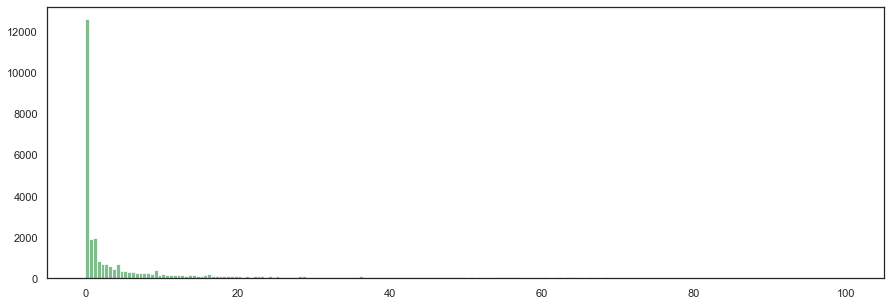

In [73]:
plt.figure(figsize=(15,5))

plt.hist(df1['review_score'], 200, facecolor='g', alpha=0.75)
plt.show()

In [74]:
y= dff1['price'].values

In [75]:
dff2 = dff1.drop(['price','room_type', 'Cluster'],axis =1)

In [76]:
# next steps : Label encoder, dummies for column of type of place
# use 3 different algorithms : random forest, regular regression, xgboost

In [77]:
dff2.head()

,0,1,2,4,5,minimum_nights,calculated_host_listings_count,availability_365,diff_weeks,review_score,Privater,Entireapt
0,0,0,0,0,1,1,6,365,37.428571,1.89,1,0
1,1,0,0,0,0,1,2,355,6.857143,17.10,0,1
2,0,0,1,0,0,3,1,365,100.000000,0.00,1,0
4,0,0,1,0,0,10,1,0,33.000000,0.90,0,1
5,1,0,0,0,0,3,1,129,2.285714,43.66,0,1


In [78]:
dff2.describe()

,0,1,2,4,5,minimum_nights,calculated_host_listings_count,availability_365,diff_weeks,review_score,Privater,Entireapt
count,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000,33112.000000
mean,0.253715,0.313331,0.176311,0.088306,0.115275,5.711645,2.158643,105.259694,42.141925,12.698344,0.477742,0.494775
std,0.435143,0.463855,0.381090,0.283744,0.319359,8.479643,3.192322,129.190120,41.561357,22.008571,0.499512,0.499980
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,3.428571,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,35.000000,26.571429,1.560000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,2.000000,189.000000,100.000000,14.280000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,30.000000,365.000000,101.000000,100.000000,1.000000,1.000000


In [79]:
#from sklearn.preprocessing import StandardScaler


#Feature Scaling
from sklearn.preprocessing import StandardScaler

X = dff2
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [80]:
X

array([[-0.58306951, -0.6755033 , -0.46265539, ..., -0.49110443,
         1.04555205, -0.98960464],
       [ 1.71506138, -0.6755033 , -0.46265539, ...,  0.2000004 ,
        -0.95643254,  1.01050455],
       [-0.58306951, -0.6755033 ,  2.16143596, ..., -0.57698136,
         1.04555205, -0.98960464],
       ...,
       [-0.58306951, -0.6755033 , -0.46265539, ..., -0.57698136,
        -0.95643254,  1.01050455],
       [ 1.71506138, -0.6755033 , -0.46265539, ..., -0.57698136,
        -0.95643254, -0.98960464],
       [ 1.71506138, -0.6755033 , -0.46265539, ..., -0.57698136,
         1.04555205, -0.98960464]])

## Modeling, evaluation and grid seach 

In [81]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### First model : multiple linear regression

In [82]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
y_predLR =lm.predict(X_test)

In [84]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predLR))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predLR))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predLR)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predLR))
print('R squared', metrics.r2_score(y_test,y_predLR))

Mean Absolute Error:  48.26560444990254
Mean Squared Error:  5181.285783363123
Root Mean Squared Error:  71.98114880552494
Explained Variance Score:  0.40868226015450637
R squared 0.40865628302219326


### Second model : random forest

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [86]:
y_predRF=rf.predict(X_test)


In [87]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predRF))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predRF))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predRF)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predRF))
print('R squared', metrics.r2_score(y_test,y_predRF))

Mean Absolute Error:  50.09196138132221
Mean Squared Error:  5660.5545380194635
Root Mean Squared Error:  75.23665687694705
Explained Variance Score:  0.3548550646371328
R squared 0.3539570097800514


In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': range(1,10,2),
    'min_samples_leaf': [20,30,50, 70,80,100],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,70,100,150]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = 4, verbose = 2,scoring='neg_mean_absolute_error')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_,grid_search.best_score_

In [ ]:
gsRF_results.best_params_

In [ ]:
gsRF_results.best_score_


In [88]:
RF_model =RandomForestRegressor(bootstrap= True,
 max_depth= 10,
 min_samples_leaf= 40,
 min_samples_split= 8,
 n_estimators= 70)
RF_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=40, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=70,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [89]:
y_predRFC = RF_model.predict(X_test)

In [90]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predRFC))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predRFC))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predRFC)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predRFC))
print('R squared', metrics.r2_score(y_test,y_predRFC))

Mean Absolute Error:  46.22986257127393
Mean Squared Error:  4935.2779768174605
Root Mean Squared Error:  70.25153362608863
Explained Variance Score:  0.43673425851036585
R squared 0.43673332351190797


#### What is the feature importance? 

Feature ranking:
1. feature 11 (0.635538)
2. feature 0 (0.150214)
3. feature 7 (0.072285)
4. feature 5 (0.045641)
5. feature 9 (0.034564)
6. feature 8 (0.022365)
7. feature 6 (0.014098)
8. feature 2 (0.013672)
9. feature 3 (0.005245)
10. feature 1 (0.003053)
11. feature 10 (0.002687)
12. feature 4 (0.000637)


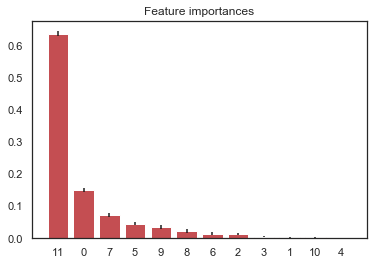

In [91]:
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Use PCA to reduce dimensionality

In [113]:
from sklearn.decomposition import PCA
pca_cc = PCA(n_components=5)
principalComponents_cc = pca_cc.fit_transform(X)

In [114]:
principal_cc_Df = pd.DataFrame(data = principalComponents_cc
             , columns = ['principal component 1', 'principal component 2','principal component 3' , 'principal component 4','principal component 5'])

In [115]:
print('Explained variation per principal component: {}'.format(pca_cc.explained_variance_ratio_))

Explained variation per principal component: [0.17737544 0.13627739 0.1243637  0.10965245 0.10396292]


### Third model : XGboost

In [92]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [93]:
y_predXG = xg_reg.predict(X_test)

In [94]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predXG))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predRF))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predXG)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predXG))
print('R squared', metrics.r2_score(y_test,y_predRF))

Mean Absolute Error:  46.7668532321375
Mean Squared Error:  5660.5545380194635
Root Mean Squared Error:  70.42309938142708
Explained Variance Score:  0.43400446093177614
R squared 0.3539570097800514


In [ ]:
from sklearn.model_selection import GridSearchCV
  
#Tune max_depth and min_child_weight
param_test1 = {
 'max_depth':range(2,4,1),
 'min_child_weight':range(3,6,1)
}
gsearch1 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test1, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

In [ ]:
#tune gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch2 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test2, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)

gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

In [ ]:
#Tune subsample and colsample_bytree
param_test3 = {
 'subsample':[i/100.0 for i in range(75,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,100,5)]
}

gsearch3 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test3, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_


In [ ]:

# Tuning Regularization Parameters
param_test4 = {
 'reg_alpha':[0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.021,0.022,0.023,0.24,0.025,0.026]
}
gsearch4 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test4, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

In [ ]:
# Tuning No. of trees
param_test5 = {
 'n_estimators':range(30,50,1)
}
gsearch5 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test5, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

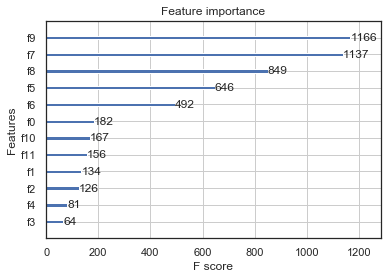

In [95]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [96]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=30,
                          max_depth=3,
                          min_child_weight=5,
                          gamma=0.8,
                          subsample=0.95,
                          colsample_bytree=0.75,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.026,
                          seed=42,
                          )
xg_reg2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0.8, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=30, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.026,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.95,
             tree_method=None, validate_parameters=False, verbosity=None)

In [97]:
y_predXG2 = xg_reg2.predict(X_test)

In [98]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predXG2))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predXG2))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predXG2)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predXG2))
print('R squared', metrics.r2_score(y_test,y_predRF))

Mean Absolute Error:  46.04304644241805
Mean Squared Error:  5138.514433781211
Root Mean Squared Error:  71.68343207311722
Explained Variance Score:  0.41663317578803116
R squared 0.3539570097800514
